## Лабораторная работа 4.3.3
# Исследование разрешающей способности микроскопа методом Аббе

In [107]:
import numpy as np
import scipy as ps
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Определение периода решеток по их пространственному спектру

Расстояние от сетки до экрана: $L = 133.7$ см  
Длина волны лазера: $\lambda = 532$ нм

Определим расстояния между соседними максимумами для всех решеток.

In [108]:
data1 = pd.read_excel('lab-433.xlsx', 'table-1')
pd.DataFrame(data1)

,$n$,"$\Delta x, мм$",$sin(\phi)$,"$d, мм$"
0,1,35.750000,0.026739,0.019896
1,2,24.250000,0.018138,0.029331
2,3,12.166667,0.009100,0.058462
3,4,6.125000,0.004581,0.116128
4,5,4.625000,0.003459,0.153791


### Определение периода решеток по изображению увеличенной модели микроскопа

Соберем новую схему и измерим в ней все необходимые нам расстояния.

<img src='lab-433.png' width=70%>

In [109]:
# Все значения указаны в см
a_1 = 9.8
a_2 = 2.5
b_1 = 90
b_2 = 36

Измерим период увеличенного изображения решетки.  
Для нахождения периода решетки необходимо разделить полученный период изображения на увеличение $\Gamma$.

Линза №1: $f = 10$ см  
Линза №2: $f = 2.5$ см  
Увеличение для системы линз: $\Gamma = \dfrac{b_1 b_2}{a_1 a_2}$

In [110]:
Gamma = b_1 * b_2 / (a_1 * a_2)
print('Г =', Gamma)

Г = 132.24489795918367


In [111]:
data2 = pd.read_excel('lab-433.xlsx', 'table-2')
pd.DataFrame(data2)

,$n$,"$\Delta x, мм$","$d, мм$"
0,1,2,0.015123
1,2,4,0.030247
2,3,9,0.068056
3,4,12,0.090741
4,5,18,0.136111


### Определение периода решеток по оценке разрешающей способности микроскопа

Поместим щелевую диафрагму в фокальную плоскость первой линзы.  
Определяем для каждой решетки минимальный размер диафрагмы $D$, при котором изображение на экране еще видно.

$l_{min} \approx \dfrac{\lambda}{D / (2f)}$, где $f$ –– фокусное расстояние $Л_1$.  
$l_{min}$ –– минимальное расстояние, разрешаемое микроскопом (период решетки $d$).

In [112]:
data3 = pd.read_excel('lab-433.xlsx', 'table-3')
pd.DataFrame(data3)

,$n$,"$D, мм$","$l_{min}, мм$"
0,1,1.95,0.054564
1,2,1.47,0.072381
2,3,1.26,0.084444
3,4,0.78,0.136410
4,5,0.60,0.177333


### Проверка метода Аббе

Для проверки метода Аббе построим график зависимости $d = f(1/D)$, взяв периоды сеток, определенные по спектру.

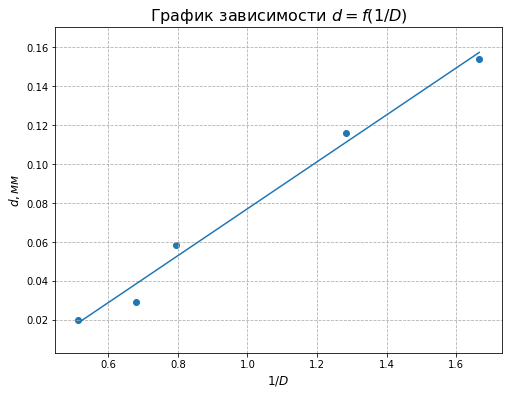

In [113]:
x = np.array(data3.values[:, 1], dtype = float)
y = np.array(data1.values[:, 3], dtype = float)
x = np.array([1 / each for each in x])

k, b = np.polyfit(x, y, deg = 1)

plt.figure(figsize = (8, 6))
plt.title('График зависимости $d = f(1/D)$', fontsize=16)
plt.ylabel('$d, мм$', fontsize=12)
plt.xlabel('$1/D$', fontsize=12)

plt.scatter(x, y)
plt.plot(x, x * k + b)
plt.grid(linestyle = '--')

plt.show()

In [114]:
print('k =', k, 'мм')

k = 0.120423429801 мм


Сравним коэффициент наклона $k$ с константой $c = 2  f \lambda = 2 \cdot 100 \cdot 532 \cdot 10^{-6} мм = 0.1064 мм$

Значения совпадают по порядку величины, следовательно, метод Аббе работает.